In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os

In [2]:
path = os.path.join('DATA', 'EX02-055BEER.csv')
path

'DATA/EX02-055BEER.csv'

In [3]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BEER           212 non-null    object 
 1   Brewery        212 non-null    object 
 2   Calories       212 non-null    int64  
 3   Carbohydrates  173 non-null    float64
 4   Alcohol        212 non-null    float64
 5   Type           212 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB


YOU CAN ONLY DO STATS AFTER YOU ANALYZE THE DATA! WHY? BECAUSE YOU HAVE TO KNOW WHAT QUESTIONS YOU WANT TO ASK!!

In [4]:
df.describe()

,Calories,Carbohydrates,Alcohol
count,212.000000,173.000000,212.000000
mean,153.938679,11.948671,5.171557
std,41.389733,4.877972,1.337357
min,55.000000,1.900000,0.400000
25%,135.000000,8.700000,4.422500
50%,150.000000,12.000000,4.900000
75%,163.500000,14.300000,5.600000
max,330.000000,32.100000,11.500000


In [5]:
df.BEER.value_counts()

Yuengling Porter              1
Blue Moon                     1
Flying Dog Kerberos Tripel    1
Milwaukee's Best Light        1
Beck's Beer                   1
                             ..
Icehouse Light                1
Breckenridge Brown Ale        1
Foster's Lager                1
Breckenridge Red Ale          1
Michelob Ultra                1
Name: BEER, Length: 212, dtype: int64

In [6]:
df.Brewery.value_counts()

MillerCoors                      40
Flying Dog Brewery               17
Sierra Nevada                    13
Anheuser Busch                   13
Budweiser                        10
                                 ..
Cerveceria Cauhtemoc (Mexico)     1
Cereveria Modela SA (Mexico)      1
O'Keefe (Canada)                  1
Labatt's                          1
Fustlich Ferstenbergische         1
Name: Brewery, Length: 68, dtype: int64

In [7]:
df.Type.value_counts()

Domestic    159
Imported     53
Name: Type, dtype: int64

In [8]:
# high_alcohol = df['Alcohol'] > 4.9

In [9]:
df.loc[:,'high_alcohol'] = df['Alcohol'] > df['Alcohol'].median()

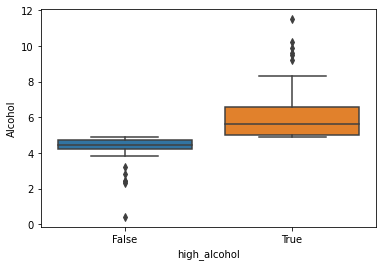

In [10]:
sns.boxplot(x='high_alcohol', y='Alcohol', data=df)

In [11]:
df.loc[:, 'high_carbs'] = (df['Carbohydrates'] > df['Carbohydrates'].median()) & (df['Carbohydrates'].notna())

In [12]:
df.loc[:, 'low_carbs'] = (df['Carbohydrates'] <= df['Carbohydrates'].median()) & (df['Carbohydrates'].notna())

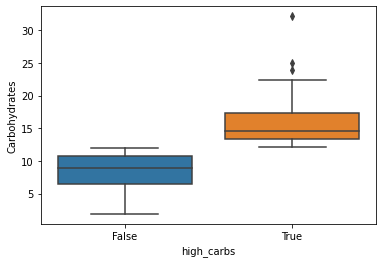

In [13]:
sns.boxplot(x='high_carbs', y='Carbohydrates', data=df)

In [14]:
df.loc[:,'high_calories'] = df['Calories'] > df['Calories'].median()

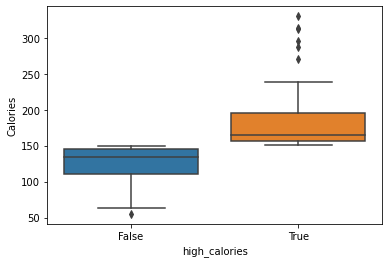

In [15]:
sns.boxplot(x='high_calories', y='Calories', data=df)

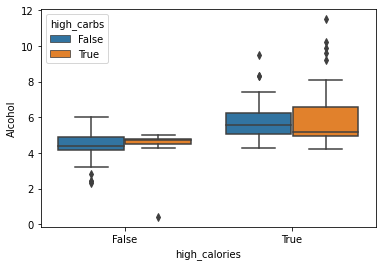

In [16]:
sns.boxplot(x='high_calories', y='Alcohol', hue='high_carbs', data=df)

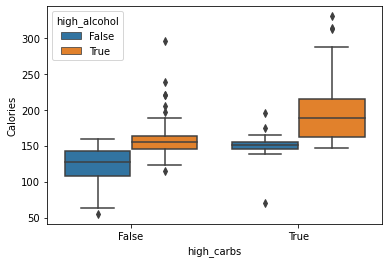

In [17]:
sns.boxplot(x='high_carbs', y='Calories', hue='high_alcohol', data=df)

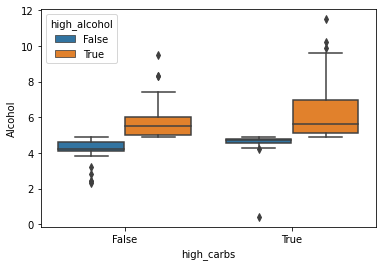

In [18]:
sns.boxplot(x='high_carbs', y='Alcohol', hue='high_alcohol', data=df)

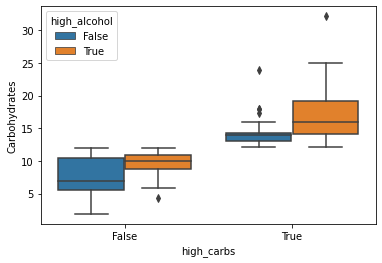

In [19]:
sns.boxplot(x='high_carbs', y='Carbohydrates', hue='high_alcohol', data=df)

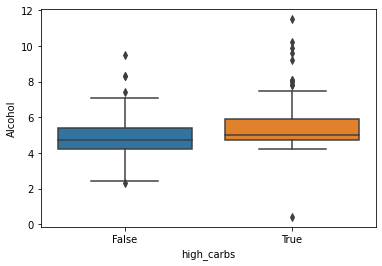

In [20]:
sns.boxplot(x='high_carbs', y='Alcohol', data=df)

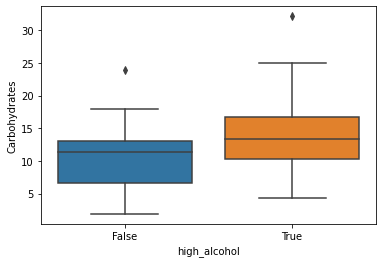

In [21]:
sns.boxplot(x='high_alcohol', y='Carbohydrates', data=df)

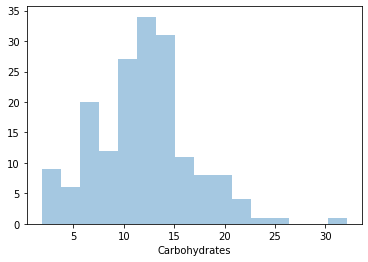

In [22]:
sns.distplot(df['Carbohydrates'], kde=False)

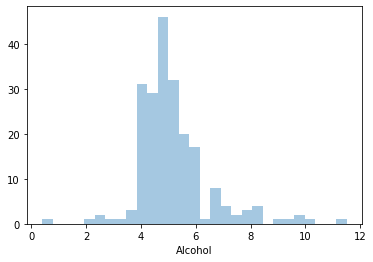

In [23]:
sns.distplot(df['Alcohol'], kde=False)

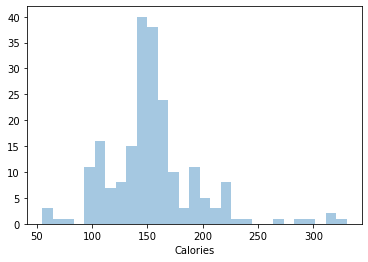

In [24]:
sns.distplot(df['Calories'], kde=False)

In [25]:
# Given this dataframe, what kind of questions could we ask about this data?
df

,BEER,Brewery,Calories,Carbohydrates,Alcohol,Type,high_alcohol,high_carbs,low_carbs,high_calories
0,American Amber Lager,Straub Brewery,136,10.5,4.10,Domestic,False,False,True,False
1,American Lager,Straub Brewery,132,10.5,4.10,Domestic,False,False,True,False
2,American Light,Straub Brewery,96,7.6,3.20,Domestic,False,False,True,False
3,Anchor Steam,Anchor,153,16.0,4.90,Domestic,False,True,False,True
4,Anheuser Busch Natural Light,Anheuser Busch,95,3.2,4.20,Domestic,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
207,Tolly Origlnal Premium Ale,Tollei-ache & Cobbold (England),146,NaN,4.85,Imported,False,False,False,False
208,Tsingtao Beer,Tsingtao (China),153,NaN,4.79,Imported,False,False,False,True
209,Watney's Red Barrel Beer,Stag (England),142,NaN,3.92,Imported,False,False,False,False
210,Wurzburger Hofbrau,Wurtzburger Hofbrauag (Germany),160,NaN,5.42,Imported,True,False,False,True


### Let's Investigate domestic versus imported beer, which is captured in the 'Type' column

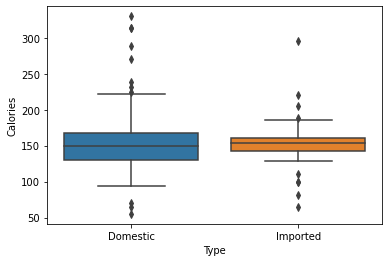

In [26]:
sns.boxplot(x='Type', y='Calories', data=df)

In [27]:
# Let's do the domestic beer first

In [28]:
domestic = df['Type'] == 'Domestic'

In [29]:
# number of domestic beers in our sample
n_domestic = len(df[domestic]['Calories'])
n_domestic

159

In [30]:
df[domestic]['Calories']

0      136
1      132
2       96
3      153
4       95
      ... 
154    145
155    150
156    135
157     98
158    135
Name: Calories, Length: 159, dtype: int64

In [31]:
df[domestic]['Calories'].mean() #SAMPLE MEAN of DOMESTIC BEER

154.80503144654088

In [32]:
# correct answer for sample standard deviation for domestic beer
df[domestic]['Calories'].std() 

44.03026548093697

In [33]:
# Now let's do the imported beer 

In [34]:
imported = df['Type'] == 'Imported'

In [35]:
# number of imported beers in our sample
n_imported = len(df[imported]['Calories'])
n_imported

53

In [36]:
df[imported]['Calories']

159     99
160    146
161    160
162    146
163    143
164     64
165    146
166    128
167    146
168    156
169    148
170    149
171    156
172    220
173    156
174    138
175    160
176    142
177    145
178    153
179    142
180    150
181    170
182     99
183    188
184    153
185    163
186    153
187    295
188    153
189    170
190     82
191    153
192    110
193    142
194    160
195    153
196    158
197    174
198    131
199    185
200    148
201    150
202    138
203    153
204    128
205    160
206    205
207    146
208    153
209    142
210    160
211    153
Name: Calories, dtype: int64

In [37]:
df[imported]['Calories'].mean() #SAMPLE MEAN of IMPORTED BEER

151.33962264150944

In [38]:
# correct answer for sample standard deviation for imported beer
df[imported]['Calories'].std() 

32.42740021139911

## ASIDE : The computation of standard deviation

### IMPORTANT: np.std() does NOT give you the same answer as pd.Series.std() by default!

The pd.Series.std() is usually the one you want, that is the SAMPLE STANDARD DEVIATION

 IN OUR CASE, WE ONLY HAVE A **SAMPLE** OF DOMESTIC AND IMPORTED BEER, NOT EVERY SINGLE BEER IN THE WHOLE POPULATION

Thus, we need to use the SAMPLE STANDARD DEVIATION CALCULATION

We can force **np.std()** to give us the SAMPLE STANDARD DEVIATION if we pass the optional argument ddof=1 to the function

In [40]:
#incorrect answer. This is the **population** standard deviation
np.std(df[imported]['Calories']) 

32.1200245519223

In [41]:
# correct answer for sample standard deviation for imported beer. ddof = delta degrees of freedom
np.std(df[imported]['Calories'], ddof=1) 

32.42740021139911

## End of ASIDE

## FINALLY, Let's DO THE TEST!

The test we need to perform is called the **Welch's t test**.

**Welch’s t-test** tests for a significant difference between the means of two independent, unrelated groups. 

Link: https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

#### Null hypothesis: The mean calories in domestic beer and imported beer are the same

#### Alternative hypothesis: The mean calories of domestic beer are different than imported beer

In [42]:
# The test we need is found in the scipy.stats module

In [43]:
from scipy import stats
#There's a lot of stuff in here! 
#The one we need is 'ttest_ind' stands for independent t-test
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c

In [44]:

stats.ttest_ind??

Signature: stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Source:   
def ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate'):
    """
    Calculate the T-test for the means of *two independent* samples of scores.

    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
  

In [45]:
# so, here is the test!

stats.ttest_ind(df[imported]['Calories'], df[domestic]['Calories'], equal_var=False)

Ttest_indResult(statistic=-0.6122863161006972, pvalue=0.5415013844411376)

#### The test gives a tstatistic of -0.61 and a pvalue of 0.54, so we **FAIL TO REJECT** the null hypothesis that the mean calories in domestic beer and imported beer are the same!


### NOTE: THE ORDER YOU PUT THE DATA IN DOESN'T MATTER
### But you must put that **equal_var=FALSE** to run the Welch's t test, for reasons that you can look up at your leisure. If you do NOT, you will actually run an inferior test that may or may not give you the 'correct' answer

In [46]:
# if you reverse the order of the data, the t-statistic changes sign, but the pvalue is unchanged!
stats.ttest_ind( df[domestic]['Calories'],df[imported]['Calories'], equal_var=False)

Ttest_indResult(statistic=0.6122863161006972, pvalue=0.5415013844411376)

Assignment: Break up into groups, discuss some of the NULL hypotheses you wrote out on the beer dataset yesterday,  and run Welch's t-tests to either reject or fail to reject them. 
Make a list!

resources: 
Using the Welch's t-test for independent sample means in Python
https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

"Welch's unequal variances t-test" https://en.wikipedia.org/wiki/Welch%27s_t-test

Using the Welch's t-test for independent sample means in Python
https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/




Inference for Two Population Means
https://www.youtube.com/playlist?list=PLvxOuBpazmsN0jpds3sD1vHmAlw5XFKx-